## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [9]:
import pandas
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [4]:
data = pandas.read_csv("QueryResults.csv", names=["DATE", "TAG", "POSTS"], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
data.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,javascript,163
2,2008-08-01 00:00:00,perl,28
3,2008-08-01 00:00:00,c#,504
4,2008-08-01 00:00:00,delphi,13


In [4]:
data.tail()

,DATE,TAG,POSTS
2602,2024-03-01 00:00:00,perl,52
2603,2024-03-01 00:00:00,python,8419
2604,2024-03-01 00:00:00,c,797
2605,2024-03-01 00:00:00,javascript,5336
2606,2024-03-01 00:00:00,swift,814


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [5]:
data.shape

(2607, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [6]:
data.count()

DATE     2607
TAG      2607
POSTS    2607
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [21]:
data.groupby("TAG").POSTS.sum()

TAG
assembly        44183
c              403716
c#            1614222
c++            806193
delphi          51826
go              72738
java          1916133
javascript    2527095
perl            68090
php           1463888
python        2189582
r              505145
ruby           229005
swift          333197
Name: POSTS, dtype: int64

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [22]:
data.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,188,188
c,188,188
c#,189,189
c++,188,188
delphi,188,188
go,173,173
java,188,188
javascript,188,188
perl,188,188


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [5]:
data["DATE"] = pandas.to_datetime(data["DATE"])

In [27]:
data.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,javascript,163
2,2008-08-01,perl,28
3,2008-08-01,c#,504
4,2008-08-01,delphi,13


TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,504.0,164.0,13.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,474.0,537.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,807.0,112.0,NaN,1148.0,722.0,128.0,604.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1729.0,734.0,140.0,NaN,954.0,580.0,97.0,497.0,448.0,1.0,157.0,NaN


## Data Manipulation



In [6]:
reshaped_data = data.pivot(index="DATE", columns="TAG", values="POSTS")

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [32]:
reshaped_data.shape

(189, 14)

In [33]:
reshaped_data.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [34]:
reshaped_data.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,504.0,164.0,13.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,474.0,537.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,807.0,112.0,NaN,1148.0,722.0,128.0,604.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1729.0,734.0,140.0,NaN,954.0,580.0,97.0,497.0,448.0,1.0,157.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [37]:
reshaped_data.count()

TAG
assembly      188
c             188
c#            189
c++           188
delphi        188
go            173
java          188
javascript    188
perl          188
php           188
python        188
r             186
ruby          188
swift         179
dtype: int64

In [7]:
reshaped_data.fillna(0, inplace=True)

In [8]:
reshaped_data.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

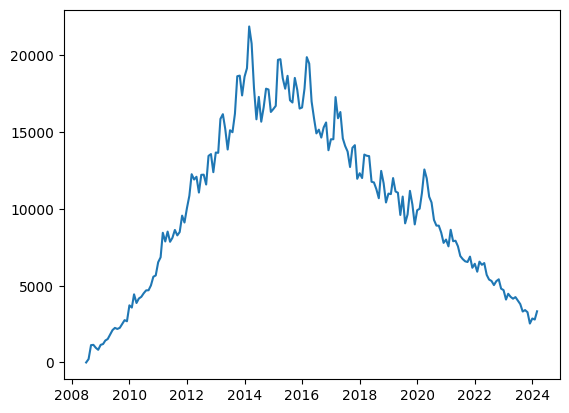

In [13]:
plt.plot(reshaped_data.index, reshaped_data["java"])

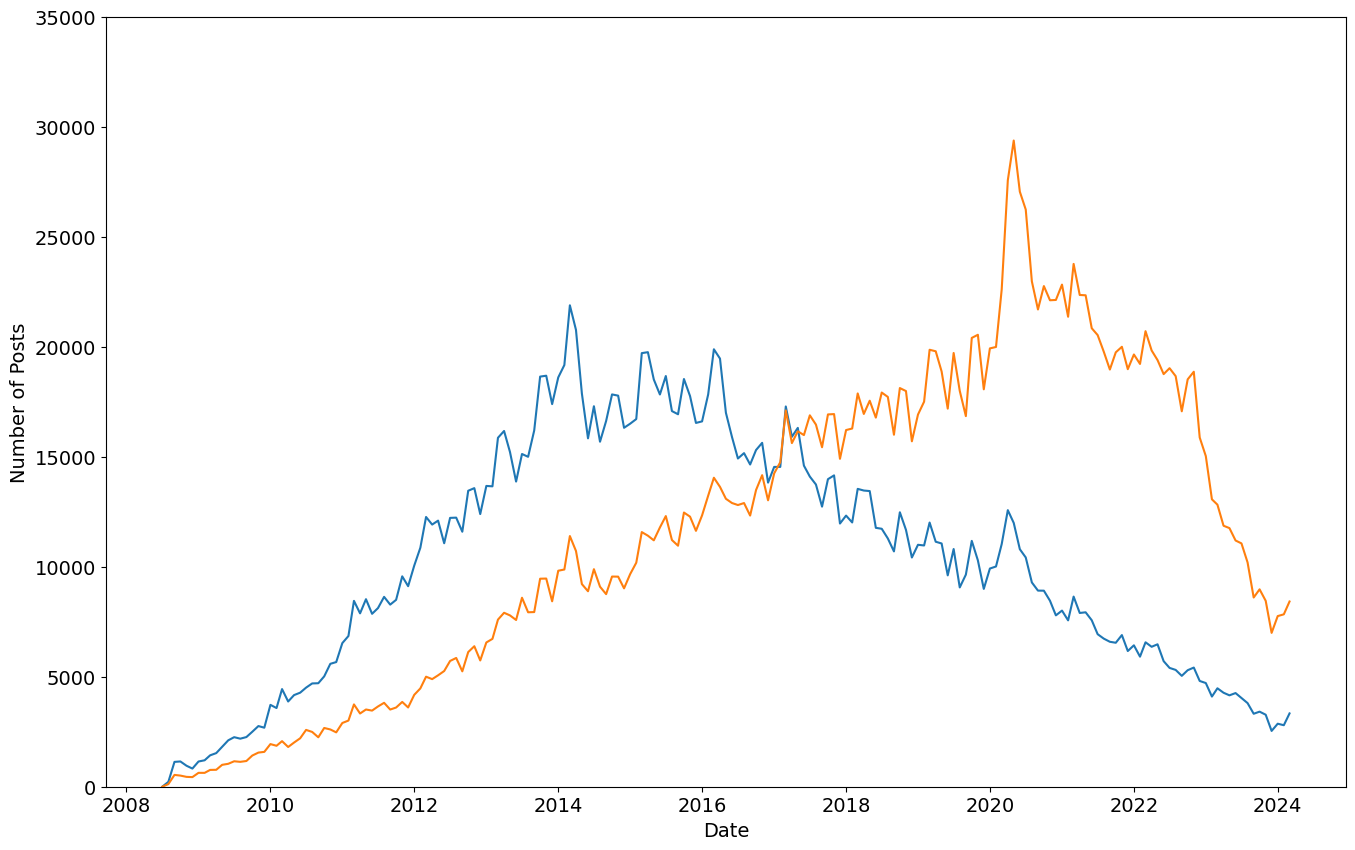

In [18]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_data.index, reshaped_data["java"])
plt.plot(reshaped_data.index, reshaped_data["python"])

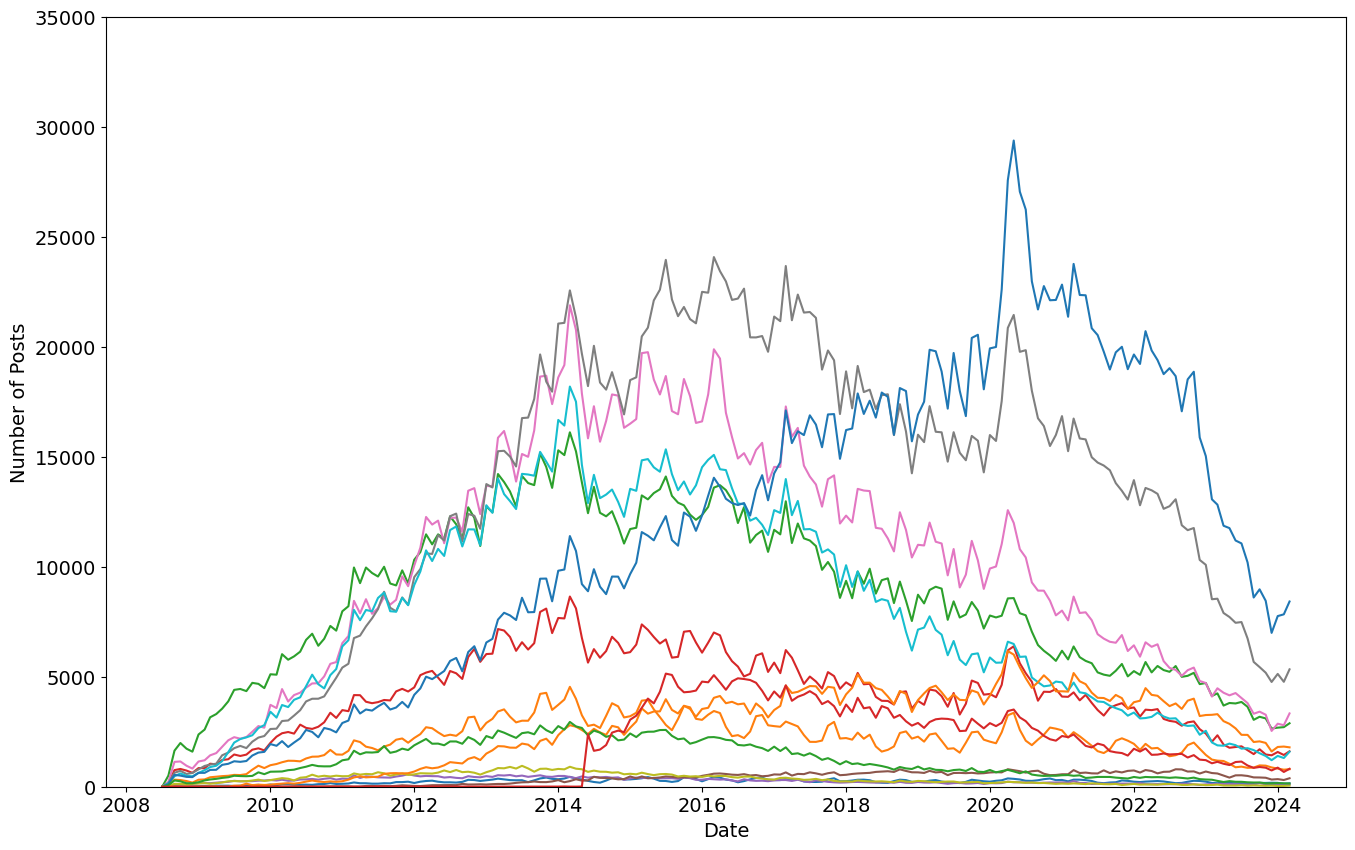

In [20]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in reshaped_data.columns:
  plt.plot(reshaped_data.index, reshaped_data[column])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

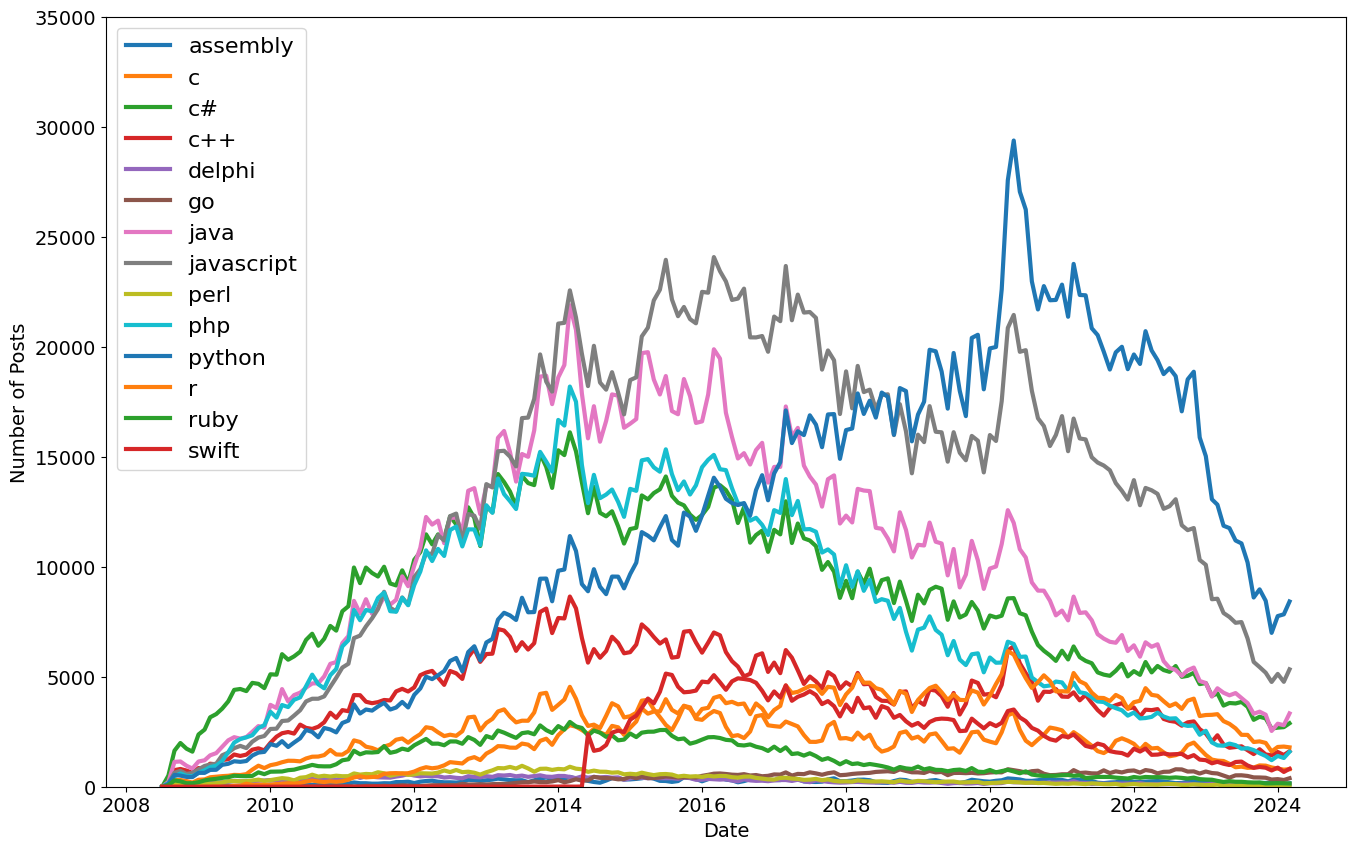

In [23]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in reshaped_data.columns:
  plt.plot(reshaped_data.index, reshaped_data[column], linewidth=3, label=column)

plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

In [24]:
roll_data = reshaped_data.rolling(window=6).mean()

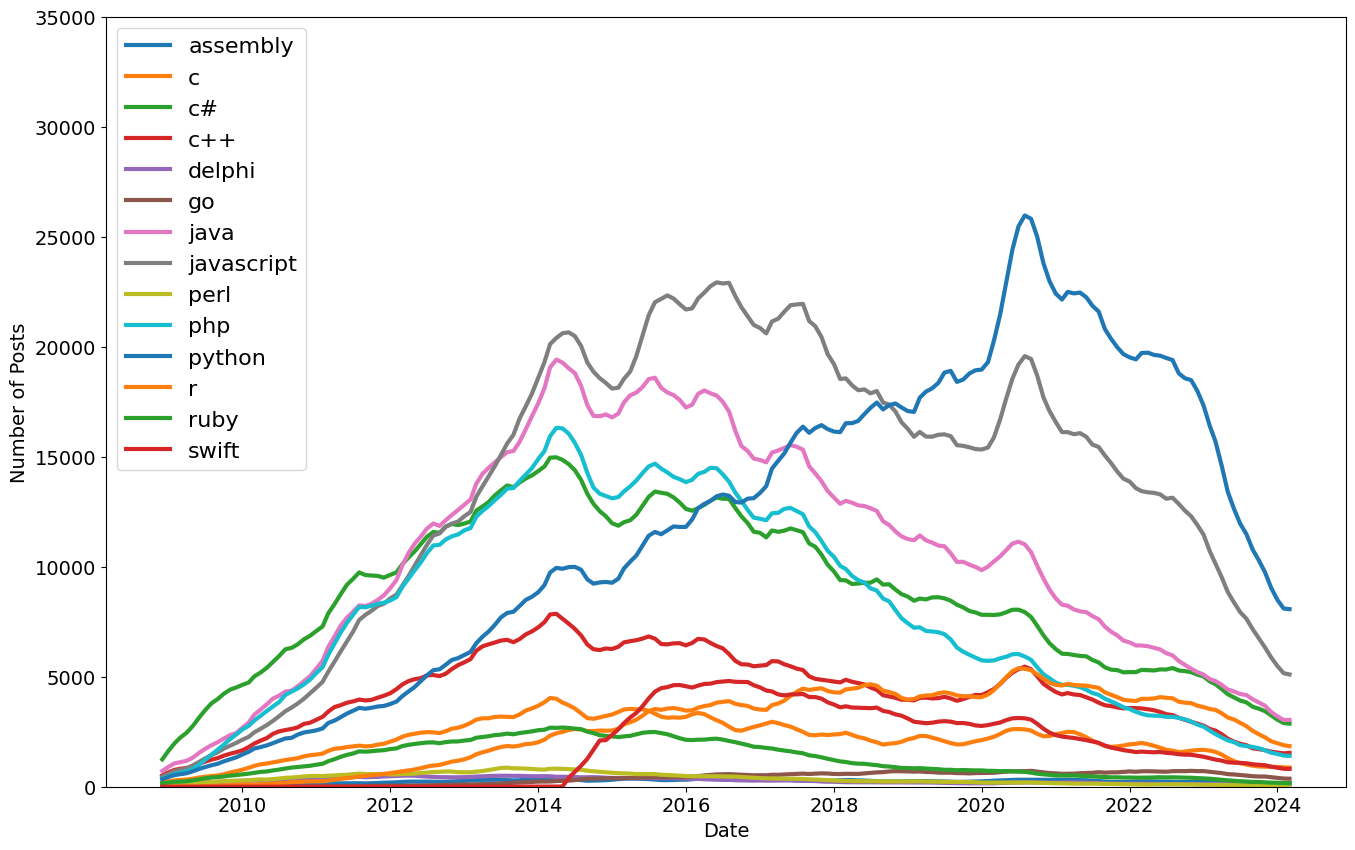

In [27]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in roll_data.columns:
  plt.plot(roll_data.index, roll_data[column], linewidth=3, label=column)

plt.legend(fontsize=16)